# Analisando transformadas com auto-valores e auto-vetores

Este capítulo está ligado ao seguintes objetivos didáticos do curos:
1. Interpretar e analisar transformações lineares
1. Aplicar a decomposição em valores singulares

Referências bibliográficas:

[Jim Hefferon - Linear Algebra - 4th Edition](https://hefferon.net/linearalgebra/) - Chap. Five, II.3

[Philip N. Klein - Coding the Matrix - 1st Edition](https://codingthematrix.com/) - Chap. 11-12

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Aula 5

# Parte 2

*Objetivo: usar autovalores e autovetores para interpretar sistemas lineares*

## Exercício 1

Um modelo que existe na macroeconomia é o de dividir a economia em setores, e entender como cada um influencia o outro. Por exemplo, na Cidade Perdida de Autovetória, existiam três setores: o primário (extrativismo, agropecuária, etc.), o secundário (envolvendo comércio e indústria) e o terciário (serviços). Cada Cruzeiro de Autovetória (C$) no setor primário em um determinado ano gerava meio C$ em cada um dos três setores no ano seguinte. Cada C$ no setor secundário gerava dez centavos no próprio setor secundário, mais dez centavos no setor terciário no ano seguinte. Cada C$ investido no setor de serviços revertia em $1.1$ C$ em cada um dos três setores.

(a) Escreva as esquações que permitem calcular o valor de cada setor da economia de Autovetória em um ano com base nos seus valores do ano anterior.

(b) Escreva as equações do ítem (a) na forma matricial.

(c) Encontre (usando Python) os autovalores e autovetores da matriz de dinâmicas que você encontrou no ítem (a)

(d) A economia de Autovetória fica estável, colapsa, ou explode?

(e) Qual é o setor mais relevante da economia de Autovetória, no longo prazo?

(a)

Primario_n+1 = 0.5Primario_n + 1.1Terciario_n

Secundario+1 = 0.5Primario_n + 0.1Seruncario_n + 1.1Terciario_n

Primario_n+1 = 0.5Primario_n + 0.1Seruncario_n + 1.1Terciario_n

In [8]:
# b)

valor_ano = np.array([[0.5,0.5,0.5], [0, 0.1, 0.1], [1.1, 1.1, 1.1]]).T
c = np.array([50, 50, 50])
c_novo = np.zeros(3)
for i in range(1):
    c_novo += valor_ano @ c
c_novo

array([80., 85., 85.])

In [13]:
# c)
valores, vetores = np.linalg.eig(valor_ano)
print("Autovalores:\n", valores)
print("Autovetores:\n", vetores)

Autovalores:
 [ 1.67006097e+00  2.99390267e-02 -8.88178420e-16]
Autovetores:
 [[ 5.53604253e-01  8.55852423e-01 -9.10366477e-01]
 [ 5.88864301e-01 -3.65729839e-01 -1.54211029e-14]
 [ 5.88864301e-01 -3.65729839e-01  4.13802944e-01]]


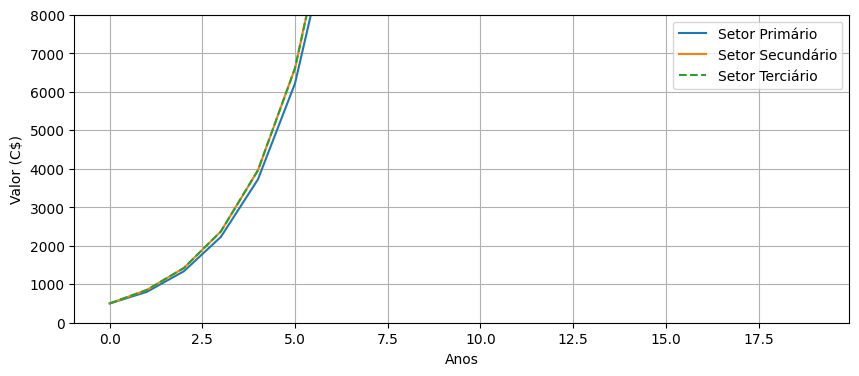

In [37]:
# d)
# Haverá uma explosão na economia:
x = np.array([[500], [500], [500]])
economia_primario = []
economia_secundario = []
economia_terciario = []
for _ in range(20):
    economia_primario.append(x[0,0])
    economia_secundario.append(x[1,0])
    economia_terciario.append(x[2,0])
    x = valor_ano @ x

plt.figure(figsize=(10,4))
plt.plot(economia_primario, label='Setor Primário')
plt.plot(economia_secundario, label='Setor Secundário')
plt.plot(economia_terciario, label='Setor Terciário', linestyle='--')
plt.ylim([0,8000])
plt.ylabel('Valor (C$)')
plt.xlabel('Anos')
plt.legend()
plt.grid(True)
plt.show()

(e)

O setor mias relevante é o Terciário

## Exercício 2

Os alquimistas de Autovetória estão testando uma nova fórmula para fazer slime. Eles usam os componentes Xistônio, Yanoreto e Zaparídio. Eles observam que as misturas desses componentes têm comportamento linear, e que:

1. Ao misturar partes iguais de cada componente, a mistura fica estável e nenhum dos componentes se altera,
2. Quando misturam 3 partes de Xistônio para 1 de Yanoreto e 1 de Zaparídio, 10% da mistura desaparece a cada hora
3. Quando Yanoreto é deixado sozinho, sem nenhuma mistura, ele absorve componentes do ar aumentando sua massa em 20% a cada hora.

Encontre a equação que permite calcular a quantidade de cada componente na mistura em uma determinada hora, tomando por base as quantidades existentes na hora anterior.

In [50]:
m1 = np.array([[1,1,1]]).T
m2 = np.array([[3,1,1]]).T
m3 = np.array([[0,1,0]]).T
c_horaanterior = np.array([[10], [100], [1]])
M = np.array([m1, m2, m3]).squeeze().T
F = np.array([[1,0,0], [0,0.9,0], [0,0,1.2]])
c_horanova = M @ F @ np.linalg.inv(M) @ c_horaanterior
print(c_horanova)

[[  8.65]
 [119.35]
 [  0.55]]


## Exercício 3

Um autômato probabilístico pode ser modelado à partir de sua matriz de transição, a exemplo do que fizemos com o surfista aleatório no algoritmo PageRank.

(a) Suponha um grafo de conexões probabilísticas com probabilidades de transição arbitrária. Use 3 vértices e quantas arestas achar necessário.

(b) Encontre a matriz de transições $A$ de tal forma que ela possa ser usada para calcular a probabilidade de estar num determinado vértice na iteração $t+1$, sabendo das probabilidades de estarmos em cada vértice na iteração $t$, isto é: $x_{t+1} = A x_t$.

(c) Encontre os autovalores e autovetores da matriz $A$.

(d) Qual é o valor do maior autovalor de $A$? Qual é o seu autovetor relacionado?

(e) Como sua resposta do ítem (d) permite prever o resultado de $A^N$, para $N \rightarrow \infty$?

(f) Interprete a frase: "O algoritmo PageRank calculou o auto-vetor mais valioso da história"

In [22]:
# a)
grafo = np.array([[0, 0.5, 0.5],[0.7, 0, 0.3],[0.2, 0.8, 0]]).T
print(f"Grafo: \n{grafo}")

# b)
x0 = np.array([1/3, 1/3, 1/3])
print(f"\nDistribuição inicial x0: {x0}")

# Evolução após algumas iterações
x = x0.copy()
for _ in range(1):
    x_t1 = grafo @ x
print(f"\n{x_t1}")

# c)
autovalores, autovetores = np.linalg.eig(grafo)

print(f"\nAutovalores:\n {autovalores}")

print(f"\nAutovetores (colunas da matriz): \n{autovetores} \n")

# d)
# Maior autovalor de A é o que corresponde a 1, ou seja o da primeira coluna

# e)
# Ao saber que meu autovetor é 1, eu consigo dizer que minha matriz A converge para uma matriz onde todas as colunas são iguais a distribuição estacionária

# f)
# A frase se refere ao fato do PageRank ser exatamente o cálculo do autovetor associado ao autovalor 1 da matriz de transição da web, 
# esse simples cálculo linear, aplicado a bilhões de páginas, gerou centenas de bilhões de dólares em valor de mercado


Grafo: 
[[0.  0.7 0.2]
 [0.5 0.  0.8]
 [0.5 0.3 0. ]]

Distribuição inicial x0: [0.33333333 0.33333333 0.33333333]

[0.3        0.43333333 0.26666667]

Autovalores:
 [ 1. +0.j         -0.5+0.24494897j -0.5-0.24494897j]

Autovetores (colunas da matriz): 
[[ 0.56488795+0.j          0.70710678+0.j          0.70710678-0.j        ]
 [ 0.66894625+0.j         -0.42426407+0.34641016j -0.42426407-0.34641016j]
 [ 0.48312785+0.j         -0.28284271-0.34641016j -0.28284271+0.34641016j]] 



## Exercício 4

A animação abaixo funciona calculando novas posições para cada ponto usando uma transformação linear $A$ a cada frame. Essa transformação é recalculada de acordo com a posição do mouse. Deixe o mouse parado em alguma posição e, à partir de observar as dinâmicas, encontre a direção do autovetor de $A$ cujo autovalor associado é 1. Após, encontre a direção do autovetor de $A$ cujo autovalor associado é menor que 1.

<iframe src="https://openprocessing.org/sketch/1921879/embed/" width="500" height="500"></iframe>

Se a transformação A tem autovalor 1, pontos na direção desse autovetor permanecem na mesma reta, então praticamente qualquer direção que eu deixe meu mouse eu vou obter a transformação com autovalor 1. 

Agora autovalor < 1 é quando eu tenho um ponto que converge para a origem.

## Exercício 5

Monte uma matriz cujos autovalores são:

$$
x_1 = \begin{bmatrix} 5\\6\\7\\8 \end{bmatrix} \hspace{1cm} x_2 = \begin{bmatrix} 1\\2\\1\\2 \end{bmatrix} \hspace{1cm} x_3 = \begin{bmatrix} 0\\1\\-1\\0 \end{bmatrix} \hspace{1cm} x_4 = \begin{bmatrix} 0\\0\\0\\1 \end{bmatrix} \hspace{1cm}
$$

e os autovalores relacionados são:

$$
\begin{bmatrix} \lambda _1 \\ \lambda _2 \\ \lambda _3 \\ \lambda _4 \end{bmatrix} = \begin{bmatrix} 0.1 \\ 0.2 \\ 0.5 \\ 2 \end{bmatrix}
$$

In [1]:
import numpy as np

# Autovetores (colunas)
v1 = np.array([5, 6, 7, 8])
v2 = np.array([1, 2, 1, 2])
v3 = np.array([0, 1, -1, 0])
v4 = np.array([0, 0, 0, 1])

P = np.column_stack((v1, v2, v3, v4))

# Autovalores
lambdas = np.array([0.1, 0.2, 0.5, 2])
D = np.diag(lambdas)

print("Matriz P:")
print(P)
print("\nMatriz D:")
print(D)

P_inv = np.linalg.inv(P)
A = P @ D @ P_inv

print("\nMatriz A:")
print(A)

Matriz P:
[[ 5  1  0  0]
 [ 6  2  1  0]
 [ 7  1 -1  0]
 [ 8  2  0  1]]

Matriz D:
[[0.1 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  2. ]]

Matriz A:
[[-0.55  0.25  0.25  0.  ]
 [ 0.3   0.2  -0.3   0.  ]
 [-2.25  0.65  1.15  0.  ]
 [ 0.6  -1.4  -1.4   2.  ]]


## Exercício 6

O número de condicionamento de uma matriz é igual a $c=\frac{\lambda _1}{\lambda _N}$, onde $\lambda _1$ é o maior autovalor (em módulo) da matriz, e $\lambda _N$ é o menor autovalor. Um número de condicionamento próximo de $1$ indica que a matriz provavelmente não levará a problemas numéricos ao ser invertida, ao passo que um número de condicionamento muito grande indica que a inversão da matriz pode levar a sistemas instáveis.

Calcule o número de condicionamento da matriz $A$ definida no código abaixo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k=3
A = np.random.normal(0,1,(k,k))
w, v = np.linalg.eig(A)

autovalores_modulo = np.abs(w)
lambda_1 = np.max(autovalores_modulo)  # Maior autovalor em módulo
lambda_N = np.min(autovalores_modulo)  # Menor autovalor em módulo

print(f"\nMaior autovalor em módulo (λ₁): {lambda_1:.6f}")
print(f"Menor autovalor em módulo (λ_N): {lambda_N:.6f}")

numero_condicionamento = lambda_1 / lambda_N

print(f"\nNúmero de condicionamento (c = λ₁/λ_N): {numero_condicionamento:.6f}")

if numero_condicionamento < 10:
    print("Interpretação: Matriz bem condicionada (c < 10)")
elif numero_condicionamento < 1000:
    print("Interpretação: Matriz razoavelmente condicionada (10 ≤ c < 1000)")
else:
    print("Interpretação: Matriz mal condicionada (c ≥ 1000)")


Maior autovalor em módulo (λ₁): 2.464101
Menor autovalor em módulo (λ_N): 0.815594

Número de condicionamento (c = λ₁/λ_N): 3.021235
Interpretação: Matriz bem condicionada (c < 10)


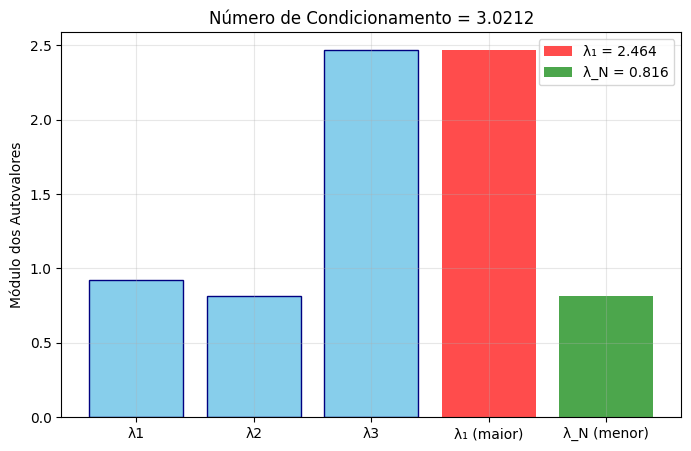

In [2]:
plt.figure(figsize=(8, 5))

autovalores_labels = [f'λ{i+1}' for i in range(len(w))]
plt.bar(autovalores_labels, autovalores_modulo, color='skyblue', edgecolor='navy')

plt.bar(['λ₁ (maior)'], [lambda_1], color='red', alpha=0.7, label=f'λ₁ = {lambda_1:.3f}')
plt.bar(['λ_N (menor)'], [lambda_N], color='green', alpha=0.7, label=f'λ_N = {lambda_N:.3f}')

plt.ylabel('Módulo dos Autovalores')
plt.title(f'Número de Condicionamento = {numero_condicionamento:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()